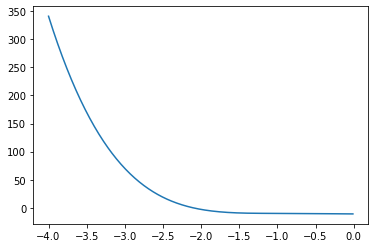

-2.1091699600219727
25


In [13]:
import matplotlib.pyplot as plt # Номер 1 метод дихотомии
import numpy as np
import math as m
from sympy import *
from sympy.abc import x

E=10**(-4) #Погрешность вычислений(точность)

y = 3*(x**4) + 8* x**3 +6 * x**2 - 11 #Уравнение
a = -1000 #Начало отрезка AB
b = 1000 #Конец отрезка AB
c = (a+b)/2
count = 0 #Счетчик
while (abs(b-a)>=E):
    if ((y.subs(x,a) * y.subs(x,c))<0): #Условия замены границы области на c
        b=c
        c = (a+b)/2
        count += 1
        continue
    if ((y.subs(x,c) * y.subs(x,b))<0):
        a=c
        c = (a+b)/2
        count += 1
        continue
        
yn = list()
xn = np.arange(-4, 0, 0.01)
for i in xn: #строим график
    yn.append(y.subs(x, i))   
plt.plot(xn, yn)
plt.show()


print (b)
print (count)

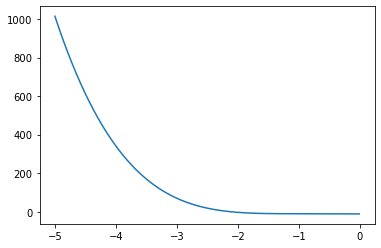

-2.10008595286565
813


In [14]:
import matplotlib.pyplot as plt # Номер 1 метод хорд
import numpy as np
import math as m
from sympy import *
from sympy.abc import x

E = 10**(-4) #Погрешность вычислений(точность)

y = 3*(x**4) + 8* x**3 +6 * x**2 - 11 #Уравнение
a = -10.0 #Крайняя точка слева х
b = 0.0 #Крайняя точка справа х
c=1000000 #Переменная для условия выхода
x0 = 0.0
count = 0 #Счётчик 
while(abs(c-b) >= E):
    k = (y.subs(x, a) - y.subs(x, b)) / (a - b) #Коэффициент прямой, соединяющей концы графика
    b1 = y.subs(x, b) - (k * b) #Коэффициент b для уравнения соединяющий концы графика
    c = b #Запоминаем предыдущее значения х - край функции
    x0 = (-b1) / k  #Точка пересечения уравнения, соединяющего края функции, и осью х  
    b = x0 #Текущее приближенное значение
    count += 1   

yn = list()
xn = np.arange(-5, 0, 0.01)
for i in xn: #строим график
    yn.append(y.subs(x, i))   
plt.plot(xn, yn)
plt.show()
    
print(b)
print(count)

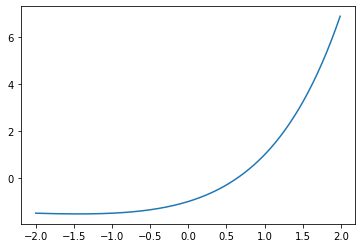

0.6411857445049862
13


In [17]:
import matplotlib.pyplot as plt # Номер 2 метод простой итерации
import numpy as np
import math as m
from sympy import *
from sympy.abc import x

E=10**(-4) #Погрешность вычислений(точность)
x0 = 10.0 #Начальная точка
c = 1000.0 #Произвольная вспомогательная переменная для условия заканчивания цикла
count = 0 #Счётчик
d = 0.0

y = x * 2**x - 1 #Уравнение
dif = diff(y,x) #Производная

while(abs(c-x0) >= E):
    d = x0 - float((y.subs(x, x0)/dif.subs(x,x0))) #Расчет последующих точек с постоянным пересчетом производной
    c = x0 #предыдущая точка
    x0 = d #Фиксация новой точки
    count += 1
    
yn = list()
xn = np.arange(-2, 2, 0.01)
for i in xn: #строим график
    yn.append(y.subs(x, i))   
plt.plot(xn, yn)
plt.show()

print (x0)
print (count)

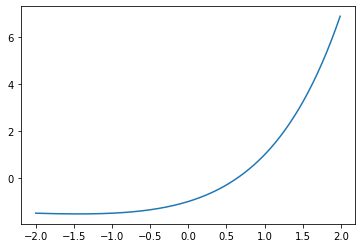

0.9426143836114508
4639


In [20]:
import matplotlib.pyplot as plt # Номер 2 метод Ньютона (Если увеличить точность, результат будет схож с предыдущим)
import numpy as np
import math as m
from sympy import *
from sympy.abc import x

E=10**(-4) #Погрешность вычислений(точность)
x0 = 10.0 #Начальная точка
c = 1000.0 #Произвольная вспомогательная переменная для условия заканчивания цикла
count = 0 #Счетчик
d = 0.0
xc=x0 #Фиксация начальной точки для производной
y = x * 2**x - 1 #Уравнение
dif = diff(y,x) #Производная

while(abs(c-x0) >= E):
    d = x0 - float((y.subs(x, x0)/dif.subs(x,xc))) #Расчет последующих точек без пересчета производной(Ньютон)
    c = x0 #Предыдущая точка
    x0 = d #Фиксация новой точки
    count+=1
    
yn = list()
xn = np.arange(-2, 2, 0.01)
for i in xn: #строим график
    yn.append(y.subs(x, i))   
plt.plot(xn, yn)
plt.show()

print (x0)
print (count)

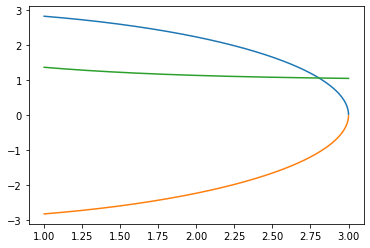

x - 2.8063314378574447
y - 1.060426263773764
Количество итераций -  6


In [22]:
import matplotlib.pyplot as plt # метод Ньютона для системы
import numpy as np
import math as m
from sympy import *
from sympy.abc import x, y

E = 10**(-4) # Точность

W = np.zeros((2, 2)) # Матрица Якоби
Wob = np.zeros((2, 2)) # Обратная матрица Якоби
F = np.zeros((2)) # Матрица функций
Xn = np.zeros((2)) # Матрица перемнных

count = 0 # счетчик итераций

Xn[0] = 1. #x0
Xn[1] = 1. #y0

S = 100 # критерии остановки
D = 100

f1 = x**2 + y**2 - 9 #Уравнения
f2 = 1 + exp(-x) - y

yy1 = sqrt(9-x**2)
yy11 = -sqrt(9-x**2)
yy2 = 1 + exp(-x)

f1x = diff(f1, x) #производные функций 1 и 2
f1y = diff(f1, y)
f2x = diff(f2, x)
f2y = diff(f2, y)

while(S >= E and D >= E): # работа метода
    F[0] = f1.subs(x, Xn[0]).subs(y, Xn[1]) # в F[0] F[1] Кладем значения х0 и х1
    F[1] = f2.subs(x, Xn[0]).subs(y, Xn[1])
    
    W[0][0] = f1x.subs(x, Xn[0]).subs(y, Xn[1])  # заполняем якобиан
    W[0][1] = f1y.subs(x, Xn[0]).subs(y, Xn[1])
    W[1][0] = f2x.subs(x, Xn[0]).subs(y, Xn[1])
    W[1][1] = f2y.subs(x, Xn[0]).subs(y, Xn[1])

    c = Xn[0]
    b = Xn[1]
    Xn = Xn - np.matmul(np.linalg.inv(W),F) #Расчёт значений по формуле
    
    S = abs(c - Xn[0]) #Критерии остановки
    D = abs(b - Xn[1])
    count += 1 #Счётчик
    
yn = list()
ynn = list()
ynnn = list()
xn = np.arange(1, 3, 0.0001)
for i in xn: #строим график
    yn.append(yy1.subs(x, i))
    ynn.append(yy11.subs(x, i)) 
    ynnn.append(yy2.subs(x, i)) 
plt.plot(xn, yn)
plt.plot(xn, ynn)
plt.plot(xn, ynnn)
plt.show()
    
print("x -", Xn[0])
print("y -", Xn[1])
print("Количество итераций - ",count)
    
    